In [295]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score

### Read the data

In [296]:
data = pd.read_csv("rainfall in india 1901-2015.csv")
data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


## Data Preparation

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [298]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [299]:
data.duplicated().sum()

0

In [300]:
data['SUBDIVISION'].value_counts()


SUBDIVISION
WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [301]:
data.mean(numeric_only=True) 


YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [302]:
data = data.fillna(data.mean(numeric_only=True)) 

In [303]:
data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [304]:
data.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [305]:
data.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909], dtype=int64)

In [306]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [307]:
data.shape

(4116, 19)

## Data Visualization

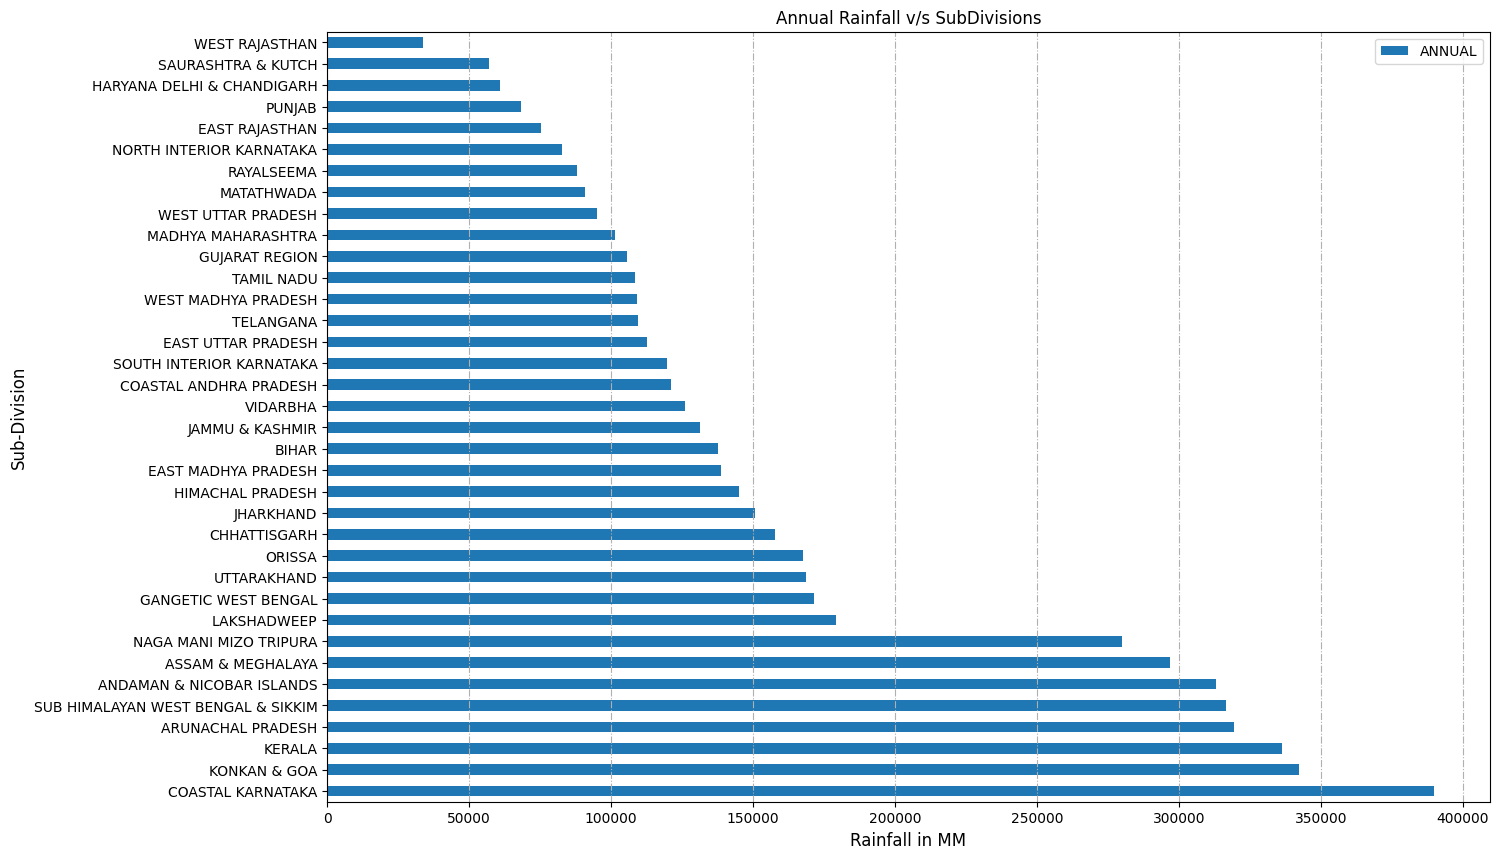

In [308]:
data[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

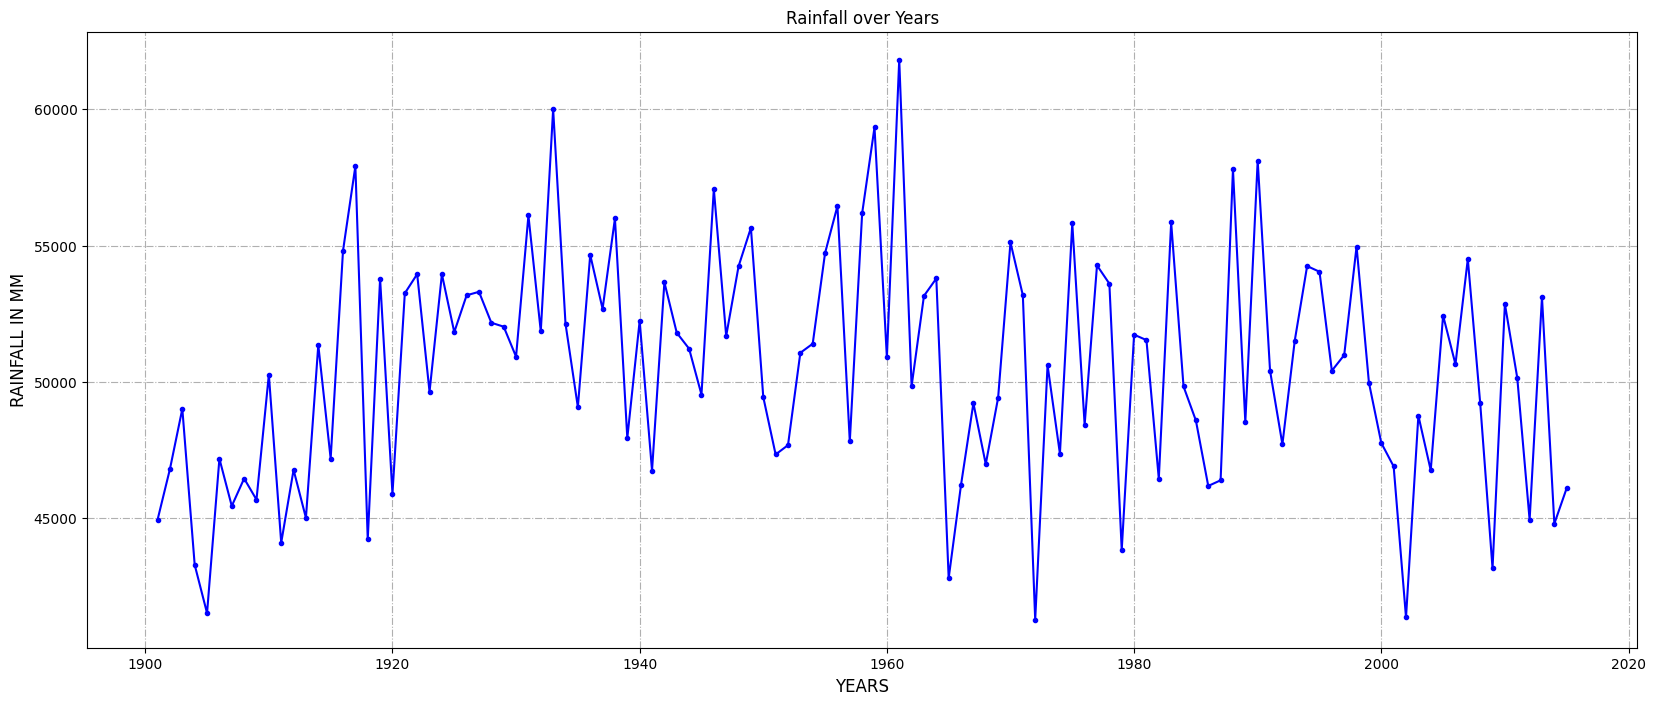

In [309]:
plt.figure(figsize=(20,8))
data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="b",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

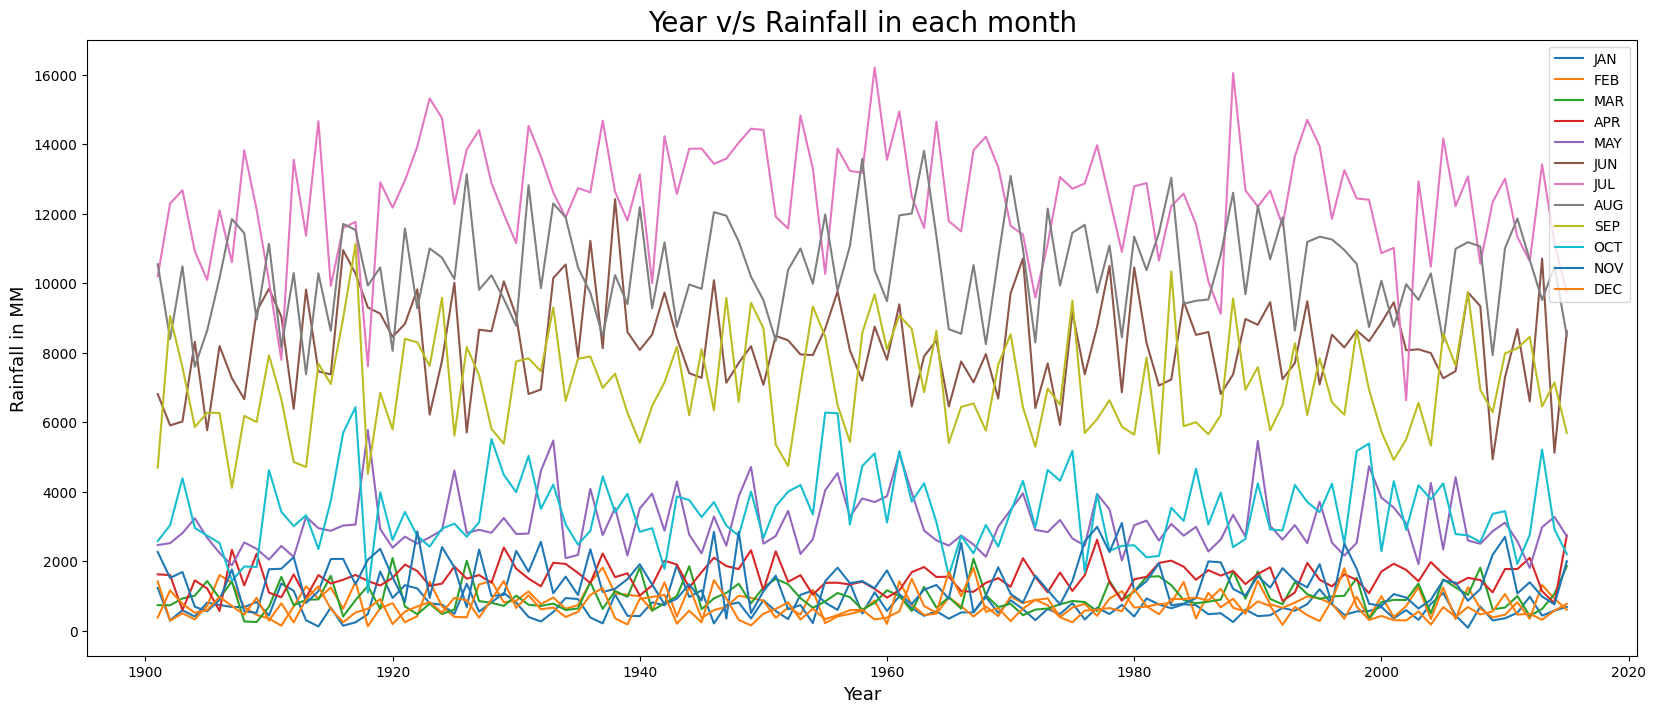

In [310]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(20,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

`Above plot shows the Year vs Rainfall in each month,
 we observe that:-
 1)July has heavy rainfall 
 2)Feb has least rainfall `

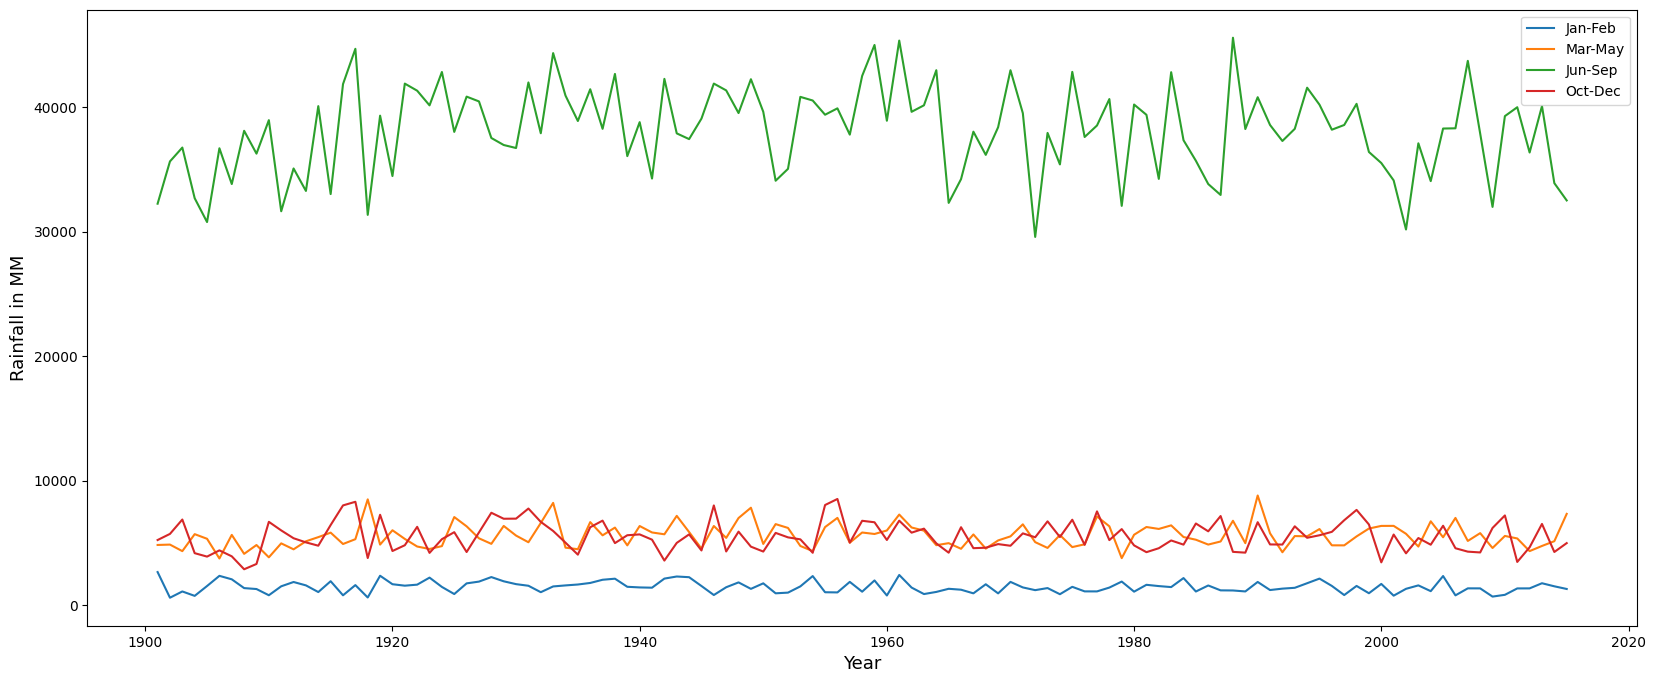

In [311]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(20,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

`From Above Graph we observe that :-
 1)combined jun,july,august,sept recieves huge rainfall
 2)combined jan,feb recieves least Rainfall`

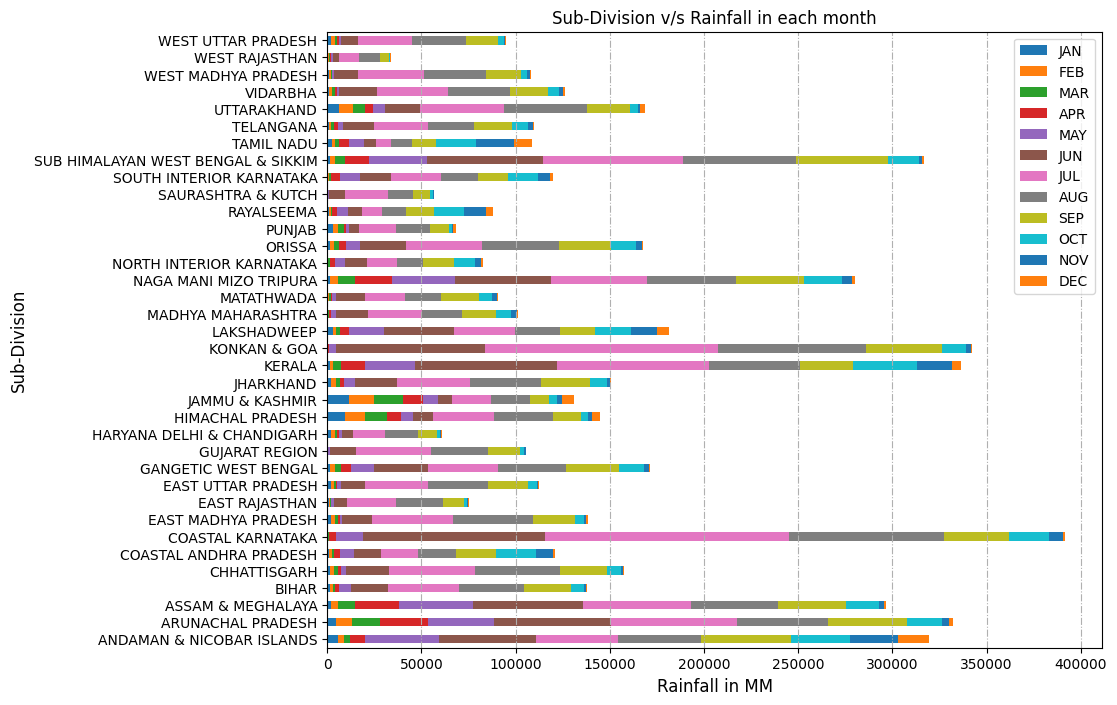

In [312]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(10,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

## Modelling 

In [313]:
data["SUBDIVISION"].nunique()

36

In [314]:
group = data.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
data = group.get_group('EAST RAJASTHAN')
data.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1932,1901,21.6,8.9,2.9,0.7,5.0,15.0,164.8,175.6,7.5,9.8,0.0,0.8
1933,1902,4.1,0.7,0.0,1.8,9.9,34.6,247.6,116.7,145.6,14.4,0.0,2.8
1934,1903,1.9,0.7,1.3,0.1,12.9,15.6,238.2,229.1,168.5,17.8,0.0,0.0
1935,1904,4.3,5.5,21.7,0.2,27.5,49.9,289.7,223.5,50.2,1.5,5.8,14.7
1936,1905,4.1,8.8,3.2,1.6,2.0,14.4,130.5,30.9,83.8,0.0,0.0,0.6


In [315]:
df=data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,21.6
1,1,1902,JAN,4.1
2,2,1903,JAN,1.9
3,3,1904,JAN,4.3
4,4,1905,JAN,4.1


In [316]:
df= df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,21.6
115,115,1901,FEB,8.9
230,230,1901,MAR,2.9
345,345,1901,APR,0.7
460,460,1901,MAY,5.0


In [317]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [318]:
df.columns=['Index','Year','Month','Avg_Rainfall']

In [319]:
df.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,21.6
115,115,1901,FEB,8.9
230,230,1901,MAR,2.9
345,345,1901,APR,0.7
460,460,1901,MAY,5.0


In [320]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(Month_map)
df.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,21.6
115,115,1901,2,8.9
230,230,1901,3,2.9
345,345,1901,4,0.7
460,460,1901,5,5.0
575,575,1901,6,15.0
690,690,1901,7,164.8
805,805,1901,8,175.6
920,920,1901,9,7.5
1035,1035,1901,10,9.8


In [321]:
df.drop(columns="Index",inplace=True)

In [322]:
df.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,21.6
115,1901,2,8.9


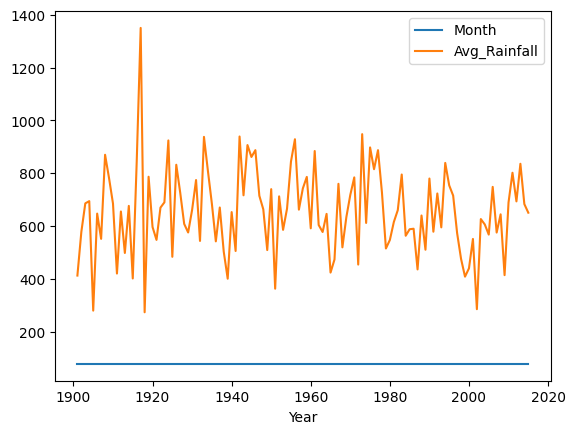

In [323]:
df.groupby("Year").sum().plot()
plt.show()

In [324]:
X=np.asanyarray(df[['Year','Month']]).astype('int')
y=np.asanyarray(df['Avg_Rainfall']).astype('int')
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


In [325]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Linear Regression Model

In [326]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [327]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [328]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 66.73104651038071
MSE: 8069.786528931836
RMSE: 89.83199056534279

-------Train Data--------
MAE: 64.85091346352783
MSE: 8042.865198188733
RMSE: 89.68202271463737

-----Training Accuracy-------
3.2
-----Testing Accuracy--------
2.3


In [329]:
predicted = LR.predict([[2014,2]])

In [330]:
predicted

array([32.33307479])

### Svm Model

In [331]:
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [332]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [333]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 55.55314009661836
MSE: 11347.920289855072
RMSE: 106.52661775281834

-------Train Data--------
MAE: 53.62732919254658
MSE: 11184.142857142857
RMSE: 105.75510794823509

-----Training Accuracy-------
25.6
-----Testing Accuracy--------
29.2


### xgboost

In [334]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [335]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [336]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 31.686229053585553
MSE: 3230.8511409324933
RMSE: 56.840576535891095

-------Train Data--------
MAE: 7.293366329671186
MSE: 154.9591251227297
RMSE: 12.448257915175509
-----------Training Accuracy------------
98.1
-----------Testing Accuracy------------
60.9


In [337]:
predicted = xgb.predict([[2014,2]])

In [338]:
predicted

array([9.962929], dtype=float32)

### Random Forest Model

In [339]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [340]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [341]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 29.693646912913458
MSE: 2361.992156608567
RMSE: 48.60033082818024

-------Train Data--------
MAE: 21.72698947365862
MSE: 1546.2664478784307
RMSE: 39.322594622919155
-----------Training Accuracy------------
81.39999999999999
-----------Testing Accuracy------------
71.39999999999999


In [342]:
score1 = r2_score(y_test, y_test_predict)
score1

0.7141057586050781

In [343]:
predicted = random_forest_model.predict([[2014,2]])

In [344]:
predicted

array([13.16612226])

# Ensemble Stacking

### Hybrid Model 1

The stacked model with meta learner = XG Boost and the weak learners = Linear Regression, Random Forest and SVM 

In [345]:
from mlxtend.regressor import StackingCVRegressor

In [346]:
stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learnin...
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...),
                    random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [347]:
y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

In [348]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 29.47447378454721
MSE: 2766.408285905565
RMSE: 52.59665660387137

-------Train Data--------
MAE: 24.89729132228695
MSE: 2333.714920989767
RMSE: 48.308538799986145


In [349]:
print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
71.89999999999999
-----------Testing Accuracy------------
66.5


In [350]:
score2 = r2_score(y_test, y_test_predict)
score2

0.665155451056535

### Hybrid Model 2

The stacked model with meta learner = Linear Regression and the weak learners = Linear Regression, Random Forest and SVM 

In [351]:
stack2 = StackingCVRegressor(regressors=(LR, random_forest_model,svm_regr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack2.fit(X_train, y_train)

y_train_predict=stack2.predict(X_train)
y_test_predict=stack2.predict(X_test)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(stack2.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack2.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 28.773974857962088
MSE: 2345.670370138973
RMSE: 48.432121264084365

-------Train Data--------
MAE: 20.7538040150462
MSE: 1485.3493636816804
RMSE: 38.54023045703905
-----------Training Accuracy------------
82.1
-----------Testing Accuracy------------
71.6


In [352]:

score3 = r2_score(y_test, y_test_predict)
score3

0.716081338730473

### Hybrid Model 3

The stacked model with meta learner = Linear Regression and the weak learners = Xgboost, Random Forest and SVM 

In [353]:
stack3 = StackingCVRegressor(regressors=( random_forest_model,xgb,svm_regr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack3.fit(X_train, y_train)

y_train_predict=stack3.predict(X_train)
y_test_predict=stack3.predict(X_test)

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(stack3.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack3.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 28.72975588483899
MSE: 2341.4379256058533
RMSE: 48.388406933953235

-------Train Data--------
MAE: 21.950066441494922
MSE: 1686.9630965074307
RMSE: 41.07265631180227
-----------Training Accuracy------------
79.7
-----------Testing Accuracy------------
71.7


In [354]:
score4 = r2_score(y_test, y_test_predict)
score4

0.7165936315065758

### Hybrid Model 4

In [355]:
stack4 = StackingCVRegressor(regressors=( random_forest_model,xgb,LR),
                            meta_regressor=random_forest_model, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack4.fit(X_train, y_train)

y_train_predict=stack4.predict(X_train)
y_test_predict=stack4.predict(X_test)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
print("-----------Training Accuracy------------")
print(round(stack4.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack4.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 26.62232871503394
MSE: 2171.731793388955
RMSE: 46.60184324025129

-------Train Data--------
MAE: 23.61699786226364
MSE: 1969.9306385870584
RMSE: 44.38390066890312
-----------Training Accuracy------------
76.3
-----------Testing Accuracy------------
73.7


In [356]:
score5 = r2_score(y_test, y_test_predict)
score5

0.7371347691197847

### Hybrid Model 5

In [357]:
stack5 = StackingCVRegressor(regressors=( LR,xgb,svm_regr),
                            meta_regressor=random_forest_model, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack5.fit(X_train, y_train)

y_train_predict=stack5.predict(X_train)
y_test_predict=stack5.predict(X_test)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
print("-----------Training Accuracy------------")
print(round(stack5.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack5.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 26.968516885544354
MSE: 2252.8511012241365
RMSE: 47.46420863370774

-------Train Data--------
MAE: 22.438810046184006
MSE: 1725.8296140741054
RMSE: 41.543105493861496
-----------Training Accuracy------------
79.2
-----------Testing Accuracy------------
72.7


In [358]:
score6 = r2_score(y_test, y_test_predict)
score6

0.7273161323765875

### Compare

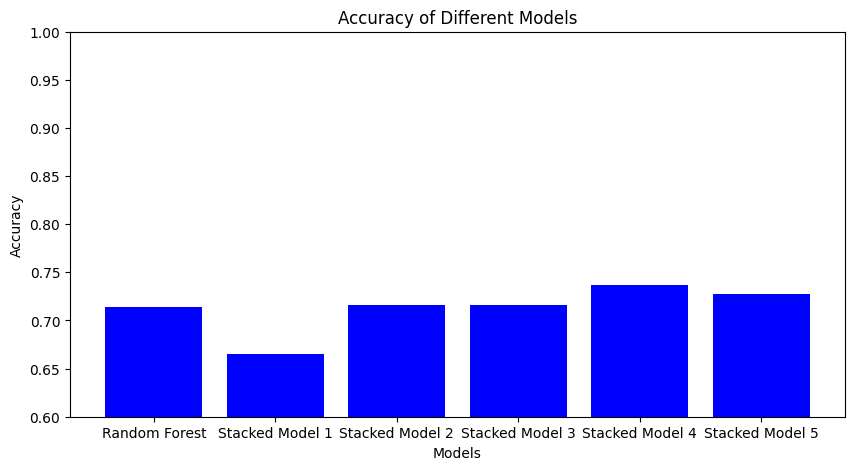

In [359]:

models = ['Random Forest', 'Stacked Model 1', 'Stacked Model 2', 'Stacked Model 3','Stacked Model 4','Stacked Model 5']
accuracies = [score1,score2,score3,score4,score5,score6]

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)  # Set y-axis limit to ensure readability
plt.show()
